# LAB 3:  ANALZING NETWORK DATA LOG 


In [1]:
import ipwhois as ip

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import plotly.express as px
import matplotlib.pyplot as plt 
sb.set() 


In [3]:
filename = "SFlow Data -Sem 1 2020.csv"

In [4]:
data = pd.read_csv(filename,header=None)
data.columns = ['Type', 'sflow_agent_address', 'inputPort', 'outputPort',
                'src_MAC', 'dst_MAC','ethernet_type', 'in_vlan','out_vlan',
                'src_IP','dst_IP','IP_protocol', 'ip_tos','ip_ttl','udp_src_port/tcp_src_port/icmp_type', 
                'udp_dst_port/tcp_dst_port/icmp_code', 'tcp_flags',
                'packet_size','IP_size','sampling_rate'] 
data.head() #Showing basic data

,Type,sflow_agent_address,inputPort,outputPort,src_MAC,dst_MAC,ethernet_type,in_vlan,out_vlan,src_IP,dst_IP,IP_protocol,ip_tos,ip_ttl,udp_src_port/tcp_src_port/icmp_type,udp_dst_port/tcp_dst_port/icmp_code,tcp_flags,packet_size,IP_size,sampling_rate
0,FLOW,203.30.38.251,129,193,00135f21bc80,0031466b23cf,0x0800,11.0,919,155.69.160.77,74.125.130.141,6,0x60,59,57577.0,443,0x10,74,52,2048
1,FLOW,203.30.38.251,129,193,00135f21bc80,0031466b23cf,0x0800,11.0,919,155.69.160.78,74.125.203.128,6,0x00,59,34809.0,443,0x10,1442,1420,2048
2,FLOW,203.30.38.251,131,193,001cb0c88e40,0031466b23cf,0x0800,43.0,919,192.122.131.134,74.125.10.12,6,0x00,57,50549.0,443,0x10,102,80,2048
3,FLOW,203.30.38.251,135,129,002688cd5fc7,00135f21bc80,0x0800,919.0,11,54.169.229.179,155.69.191.254,17,0x00,57,16285.0,39641,0x10,580,562,2048
4,FLOW,203.30.38.251,193,130,0031466b23cf,00239cd087c1,0x0800,919.0,919,209.85.229.247,137.132.228.34,17,0x00,63,443.0,32817,0x00,1396,1378,2048


In [5]:
print(f'Original data dimensions: {data.shape}')
data.drop(data[data['Type'] == 'CNTR'].index, inplace=True) #removing CNTR Type entries and get dimension of dataframe
print(f'Flow only data dimensions: {data.shape}')

Original data dimensions: (204003, 20)
Flow only data dimensions: (202788, 20)


In [6]:
def searchOrg(IP_add): #function to return organization name using IP address
    reply = ip.IPWhois(IP_add).lookup_whois()
    return reply['asn_description']
    

### Top 5 Talker task:
#### Counting most number of repeated src_IP

In [7]:
topTalk = data.src_IP.value_counts()[:5]
top5Talk = pd.DataFrame({'src_IP':topTalk.index, 'Count':topTalk.values})
top5Talk.insert(2, "Organisation", [searchOrg(top5Talk.src_IP[0]), searchOrg(top5Talk.src_IP[1]),
                                    searchOrg(top5Talk.src_IP[2]), searchOrg(top5Talk.src_IP[3]),
                                   searchOrg(top5Talk.src_IP[4])], True) 
top5Talk.head() #displaying the top 5 talker

,src_IP,Count,Organisation
0,103.26.47.233,9646,MYREN-MY Malaysian Research & Education Networ...
1,13.107.4.50,4950,"MICROSOFT-CORP-MSN-AS-BLOCK, US"
2,155.69.160.78,4563,"NTU-AS-AP Nanyang Technological University, SG"
3,130.14.250.7,3914,"NLM-GW, US"
4,173.194.22.215,2896,"GOOGLE, US"


## Top 5 Listener task:
###### Counting most number of repeated dst_IP

In [8]:
topList = data.dst_IP.value_counts()[:5]
top5List = pd.DataFrame({'dst_IP':topList.index, 'Count':topList.values})
top5List.insert(2, "Organisation", [searchOrg(top5List.dst_IP[0]), searchOrg(top5List.dst_IP[1]),
                                    searchOrg(top5List.dst_IP[2]), searchOrg(top5List.dst_IP[3]),
                                   searchOrg(top5List.dst_IP[4])], True) 
top5List.head()#displaying top 5 listeners

,dst_IP,Count,Organisation
0,103.22.221.73,9646,"APAN-KR-AS National Infomation Society Agency, KR"
1,137.132.228.33,7835,"NUS-AS-AP NUS Information Technology, SG"
2,137.132.228.29,5964,"NUS-AS-AP NUS Information Technology, SG"
3,137.132.228.42,4987,"NUS-AS-AP NUS Information Technology, SG"
4,103.37.198.100,3915,"A-STAR-AS-AP A-STAR, SG"


## Transport protocol
###### Percentage of TCP vs UDP using IP_protocol where TCP == 6 UDP == 17

In [9]:
TCP = data[data.IP_protocol == 6]
TCP.shape

(155799, 20)

In [10]:
UDP = data[data.IP_protocol == 17]
UDP.shape

(45377, 20)

In [11]:
Others = data.shape[0] - (TCP.shape[0]+UDP.shape[0])
print(Others)

1612


In [12]:
IP_protocol = pd.DataFrame(data[["src_MAC","dst_MAC","IP_protocol"]])
IP_protocol = IP_protocol.groupby(["IP_protocol"], as_index=False).count()
IP_protocol["percentage"] = IP_protocol["src_MAC"] / IP_protocol["dst_MAC"].sum()
IP_protocol.head(10) 

,IP_protocol,src_MAC,dst_MAC,percentage
0,0,3,3,0.000015
1,1,62,62,0.000306
2,2,2,2,0.000010
3,6,155799,155799,0.768285
4,17,45377,45377,0.223766
5,41,3,3,0.000015
6,47,891,891,0.004394
7,50,643,643,0.003171
8,58,7,7,0.000035
9,89,1,1,0.000005


In [13]:
IP_protocol.rename(columns={'src_MAC':'Packet Count'}, inplace=True)
del IP_protocol['dst_MAC']
IP_protocol["Protocol Name"] = ["HOPOPT","ICMP","IGMP","TCP","UDP","IPv6","GREs","ESP","IPv6-ICMP","OSPF"]
IP_protocol.head(10) #displaying each protocol and their respective percentages

,IP_protocol,Packet Count,percentage,Protocol Name
0,0,3,0.000015,HOPOPT
1,1,62,0.000306,ICMP
2,2,2,0.000010,IGMP
3,6,155799,0.768285,TCP
4,17,45377,0.223766,UDP
5,41,3,0.000015,IPv6
6,47,891,0.004394,GREs
7,50,643,0.003171,ESP
8,58,7,0.000035,IPv6-ICMP
9,89,1,0.000005,OSPF


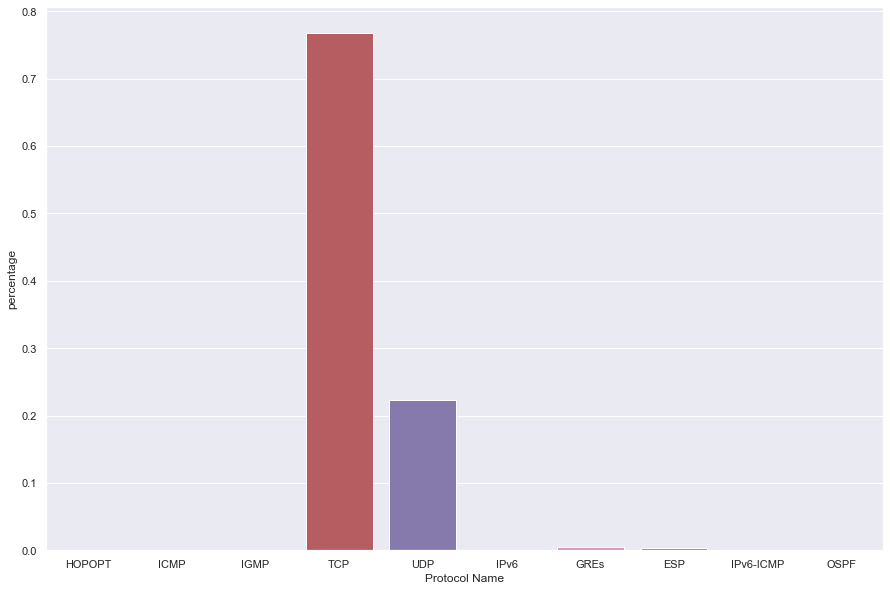

In [14]:
plt.figure(figsize=(15,10))
fig = sb.barplot(x="Protocol Name", y='percentage', data =IP_protocol)
#Visualize the data and percentages

##  APPLICATIONS PROTOCOL
######  Most frequently used application protocol using Destination port address

In [15]:
Applications_protocol = pd.DataFrame(data[["src_IP","udp_dst_port/tcp_dst_port/icmp_code"]])
Applications_protocol = Applications_protocol.groupby(["udp_dst_port/tcp_dst_port/icmp_code"], as_index=False).count()
Applications_protocol = Applications_protocol.sort_values(by=['src_IP'], ascending=False)
top5App = Applications_protocol.head(5)

In [16]:
top5App.insert(1, "Service", ['HTTPS','HTTP','Dynamic ports/private ports','Registered ports','Registered ports'], True)
top5App.rename(columns={"src_IP": "# of packets"},inplace = True)
top5App.head() #Show the port number and their respective servies

C:\Users\tangz\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,udp_dst_port/tcp_dst_port/icmp_code,Service,# of packets
22,443,HTTPS,42975
12,80,HTTP,11960
16351,56800,Dynamic ports/private ports,3918
3992,15000,Registered ports,2697
10385,44678,Registered ports,1158


In [17]:
trafficdata = pd.DataFrame(data["IP_size"]) ##in bytes
total_ip_size = (trafficdata['IP_size'].sum()/(2**(20)))*1000 # convert to MB * 1000 for 1 in 1000 sampling
print("Total Traffic(MB): " + str(total_ip_size) + "MB") #show total data traffic in MB

Total Traffic(MB): 189937.23583221436MB


# 3E: Additional Analysis
###### Top 5 Communication pair

In [18]:
trafficdata = pd.DataFrame(data[["src_IP","dst_IP","packet_size"]])
pairdata = trafficdata.groupby(['src_IP','dst_IP'], as_index=False).count()
pairdata = pairdata.sort_values(by=['packet_size'], ascending=False)
pairdata.rename(columns={"packet_size" : "# of packets"},inplace = True)
top_pair = pairdata.head(5)
top_pair.head()

,src_IP,dst_IP,# of packets
198,103.26.47.233,103.22.221.73,9646
3757,130.14.250.7,103.37.198.100,3914
3449,129.99.230.54,137.132.22.74,2689
637,104.44.201.147,202.21.159.244,2454
15154,202.21.159.244,104.44.201.147,2154


In [19]:
top_pair.insert(3, "Source Organisation", [searchOrg(top_pair.src_IP.tolist()[0]), searchOrg(top_pair.src_IP.tolist()[1]),
                                    searchOrg(top_pair.src_IP.tolist()[2]), searchOrg(top_pair.src_IP.tolist()[3]),
                                   searchOrg(top_pair.src_IP.tolist()[4])], True)
top_pair.insert(4, "Destination Organisation", [searchOrg(top_pair.dst_IP.tolist()[0]), searchOrg(top_pair.dst_IP.tolist()[1]),
                                    searchOrg(top_pair.dst_IP.tolist()[2]), searchOrg(top_pair.dst_IP.tolist()[3]),
                                   searchOrg(top_pair.dst_IP.tolist()[4])], True)
pd.set_option('display.max_rows', None)
top_pair.head() #show the top 5 communication pair in terms of packets exchanged and their organizations

,src_IP,dst_IP,# of packets,Source Organisation,Destination Organisation
198,103.26.47.233,103.22.221.73,9646,MYREN-MY Malaysian Research & Education Networ...,"APAN-KR-AS National Infomation Society Agency, KR"
3757,130.14.250.7,103.37.198.100,3914,"NLM-GW, US","A-STAR-AS-AP A-STAR, SG"
3449,129.99.230.54,137.132.22.74,2689,"AS10343, US","NUS-AS-AP NUS Information Technology, SG"
637,104.44.201.147,202.21.159.244,2454,"MICROSOFT-CORP-MSN-AS-BLOCK, US",REPUBLICPOLYTECHNIC-AS Republic Polytechnic. M...
15154,202.21.159.244,104.44.201.147,2154,REPUBLICPOLYTECHNIC-AS Republic Polytechnic. M...,"MICROSOFT-CORP-MSN-AS-BLOCK, US"


##### Top 5 Communication pair in terms of Size of Packet

In [20]:
traffic_size = pd.DataFrame(data[["src_IP","dst_IP","packet_size"]])
pair_size = traffic_size.groupby(['src_IP','dst_IP'], as_index=False).sum()
pair_size = pair_size.sort_values(by=['packet_size'], ascending=False)
pair_size.rename(columns={"packet_size" : "Sum of packet size"},inplace = True)
top_pair_size = pair_size.head(5)
top_pair_size.head()

,src_IP,dst_IP,Sum of packet size
198,103.26.47.233,103.22.221.73,14232914
3757,130.14.250.7,103.37.198.100,5957108
3449,129.99.230.54,137.132.22.74,3853802
14398,192.170.233.203,202.6.241.101,1747566
3575,13.107.4.50,210.48.222.13,1624899


In [21]:
top_pair_size.insert(3, "Source Organisation", [searchOrg(top_pair_size.src_IP.tolist()[0]), searchOrg(top_pair_size.src_IP.tolist()[1]),
                                    searchOrg(top_pair_size.src_IP.tolist()[2]), searchOrg(top_pair_size.src_IP.tolist()[3]),
                                   searchOrg(top_pair_size.src_IP.tolist()[4])], True)
top_pair_size.insert(4, "Destination Organisation", [searchOrg(top_pair_size.dst_IP.tolist()[0]), searchOrg(top_pair_size.dst_IP.tolist()[1]),
                                    searchOrg(top_pair_size.dst_IP.tolist()[2]), searchOrg(top_pair_size.dst_IP.tolist()[3]),
                                   searchOrg(top_pair_size.dst_IP.tolist()[4])], True)
pd.set_option('display.max_rows', None)
top_pair_size.head() #shows the top 5 communcation pair in terms of Size of total packet sent and their organizations


,src_IP,dst_IP,Sum of packet size,Source Organisation,Destination Organisation
198,103.26.47.233,103.22.221.73,14232914,MYREN-MY Malaysian Research & Education Networ...,"APAN-KR-AS National Infomation Society Agency, KR"
3757,130.14.250.7,103.37.198.100,5957108,"NLM-GW, US","A-STAR-AS-AP A-STAR, SG"
3449,129.99.230.54,137.132.22.74,3853802,"AS10343, US","NUS-AS-AP NUS Information Technology, SG"
14398,192.170.233.203,202.6.241.101,1747566,"U-CHICAGO-AS, US","A-STAR-AS-AP A-STAR, SG"
3575,13.107.4.50,210.48.222.13,1624899,"MICROSOFT-CORP-MSN-AS-BLOCK, US",IIUM-MY International Islamic University Of Ma...


## E.2 MAC address analysis

In [22]:
import networkx as nx

In [23]:
data.head()

,Type,sflow_agent_address,inputPort,outputPort,src_MAC,dst_MAC,ethernet_type,in_vlan,out_vlan,src_IP,dst_IP,IP_protocol,ip_tos,ip_ttl,udp_src_port/tcp_src_port/icmp_type,udp_dst_port/tcp_dst_port/icmp_code,tcp_flags,packet_size,IP_size,sampling_rate
0,FLOW,203.30.38.251,129,193,00135f21bc80,0031466b23cf,0x0800,11.0,919,155.69.160.77,74.125.130.141,6,0x60,59,57577.0,443,0x10,74,52,2048
1,FLOW,203.30.38.251,129,193,00135f21bc80,0031466b23cf,0x0800,11.0,919,155.69.160.78,74.125.203.128,6,0x00,59,34809.0,443,0x10,1442,1420,2048
2,FLOW,203.30.38.251,131,193,001cb0c88e40,0031466b23cf,0x0800,43.0,919,192.122.131.134,74.125.10.12,6,0x00,57,50549.0,443,0x10,102,80,2048
3,FLOW,203.30.38.251,135,129,002688cd5fc7,00135f21bc80,0x0800,919.0,11,54.169.229.179,155.69.191.254,17,0x00,57,16285.0,39641,0x10,580,562,2048
4,FLOW,203.30.38.251,193,130,0031466b23cf,00239cd087c1,0x0800,919.0,919,209.85.229.247,137.132.228.34,17,0x00,63,443.0,32817,0x00,1396,1378,2048


#### Top 5 Communication pair between Mac Address

In [32]:
mac_address = pd.DataFrame(data[["src_MAC","dst_MAC","src_IP","dst_IP"]])
mac_address = mac_address.groupby(["src_MAC","dst_MAC"], as_index=False).count()
mac_address.rename(columns={"src_IP" : "# of packets"},inplace = True)
mac_address = mac_address.sort_values(by=['# of packets'], ascending=False)

top5_mac = mac_address.head(5)


In [33]:
top5_mac.insert(4, "Source Vendor", [get_mac_details(top5_mac.src_MAC.tolist()[0]), get_mac_details(top5_mac.src_MAC.tolist()[1]),
                                    get_mac_details(top5_mac.src_MAC.tolist()[2]), get_mac_details(top5_mac.src_MAC.tolist()[3]),
                                   get_mac_details(top5_mac.src_MAC.tolist()[4])], True)


In [34]:
top5_mac.insert(5, "Destination Vendor", [get_mac_details(top5_mac.dst_MAC.tolist()[0]), get_mac_details(top5_mac.dst_MAC.tolist()[1]),
                                    get_mac_details(top5_mac.dst_MAC.tolist()[2]), get_mac_details(top5_mac.dst_MAC.tolist()[3]),
                                   get_mac_details(top5_mac.dst_MAC.tolist()[4])], True)
del top5_mac['dst_IP']
top5_mac.head()

,src_MAC,dst_MAC,# of packets,Source Vendor,Destination Vendor
124,0031466b23cf,00239cd087c1,57720,Juniper Networks,Juniper Networks
19,00135f21bc80,0031466b23cf,22393,"Cisco Systems, Inc",Juniper Networks
252,ccef48570144,70e42269fb68,9695,"Cisco Systems, Inc","Cisco Systems, Inc"
239,8cb64fe6b643,00235ed9b680,8445,"Cisco Systems, Inc","Cisco Systems, Inc"
93,00235ed9b680,8cb64fe6b643,7618,"Cisco Systems, Inc","Cisco Systems, Inc"


In [35]:
mac_address.shape

(304, 4)

## Analysis on connections between Mac Address

In [36]:
src_Mac_list = list(mac_address.src_MAC)
dst_Mac_list = list(mac_address.dst_MAC)

# building a graph based on MAC address pair
G = nx.Graph()
count = 0
for a,b in zip(src_Mac_list, dst_Mac_list): 
    G.add_edge(a, b)

In [37]:
Maclist = []
Edgelist = []
for i in G:
    Maclist.append(i)
    Edgelist.append(len(G.edges(i)))
    #print(f'MAC Address: {i}, Number of Edges: {len(G.edges(i))}')

In [38]:
print(f'Unique Mac Address: {len(Maclist)} , Total Number of Connections including duplicates: {sum(Edgelist)}')


Unique Mac Address: 96 , Total Number of Connections including duplicates: 450


In [39]:
MacFrame = pd.DataFrame(columns = ['Mac', 'Edges']) 
MacFrame['Mac'] = Maclist
MacFrame['Edges'] = Edgelist
MacFrame = MacFrame.sort_values('Edges',ascending = False)
MacFrame.head(10) #sort the Mac address from most number of connections

,Mac,Edges
6,00235ed9b680,38
9,001cb0c88e40,28
14,e00eda07c0ff,25
2,00135f21bc80,23
8,80711fc76001,16
12,50878977e470,16
17,544b8cf9a7df,16
22,002438aa0a00,13
21,f40f1b3dc43f,12
1,00239cd087c1,11


In [40]:
TopMac =[]
top5Mac = MacFrame.head(5)
TopMac = top5Mac['Mac'].tolist()


In [41]:
color_map = []
for node in G:
    if node in TopMac:
        color_map.append('red')
    else: 
        color_map.append('green')  
pos = nx.spring_layout(G,k=0.1,iterations=20)
plt.figure(3, figsize=(150, 150))

nx.draw(G, with_labels=True, node_size=1500, node_color=color_map, pos=nx.spring_layout(G))

plt.savefig("MAC_NETWORK.png") # save as png
plt.show() #Graphical representation with the top 5 address with most connections coloured red

In [42]:
import requests
def get_mac_details(mac_address):  #convert MAC address to vendor
      
    # We will use an API to get the vendor details 
    url = "https://api.macvendors.com/"
      
    # Use get method to fetch details 
    response = requests.get(url+mac_address) 
    #if response.status_code != 200: 
        #raise Exception("[!] Invalid MAC Address!") 
    return response.content.decode() 

In [43]:
MacFrame.head()

,Mac,Edges
6,00235ed9b680,38
9,001cb0c88e40,28
14,e00eda07c0ff,25
2,00135f21bc80,23
8,80711fc76001,16


In [44]:
MacList = []
MacList = MacFrame['Mac'].tolist()


In [45]:
#long running
VendorList = []
for x in range(len(MacList)):
    VendorList.append(get_mac_details(MacList[x]))


In [46]:
MacFrame.insert(2, "Vendor", VendorList, True)
pd.set_option('display.max_rows', None)
MacFrame.head(96)

,Mac,Edges,Vendor
6,00235ed9b680,38,"Cisco Systems, Inc"
9,001cb0c88e40,28,"Cisco Systems, Inc"
14,e00eda07c0ff,25,"Cisco Systems, Inc"
2,00135f21bc80,23,"Cisco Systems, Inc"
8,80711fc76001,16,Juniper Networks
12,50878977e470,16,"Cisco Systems, Inc"
17,544b8cf9a7df,16,Juniper Networks
22,002438aa0a00,13,Brocade Communications Systems LLC
21,f40f1b3dc43f,12,"Cisco Systems, Inc"
1,00239cd087c1,11,Juniper Networks


In [47]:
writer = pd.ExcelWriter('MacVendor.xlsx', engine='xlsxwriter')
MacFrame.to_excel(writer, sheet_name='Sheet1',startcol=1)
writer.save()

In [49]:
cleaned_mac = pd.read_excel('MacVendor.xlsx',header=0)
del cleaned_mac['Unnamed: 0']
del cleaned_mac['Unnamed: 1']
cleaned_mac.head(30)

,Mac,Edges,Vendor
0,00235ed9b680,38,"Cisco Systems, Inc"
1,001cb0c88e40,28,"Cisco Systems, Inc"
2,e00eda07c0ff,25,"Cisco Systems, Inc"
3,00135f21bc80,23,"Cisco Systems, Inc"
4,80711fc76001,16,Juniper Networks
5,50878977e470,16,"Cisco Systems, Inc"
6,544b8cf9a7df,16,Juniper Networks
7,002438aa0a00,13,Brocade Communications Systems LLC
8,f40f1b3dc43f,12,"Cisco Systems, Inc"
9,00239cd087c1,11,Juniper Networks


In [50]:
group_mac = cleaned_mac.groupby(['Vendor']).sum()
group_mac = group_mac.sort_values('Edges',ascending = False)
group_mac['Vendor'] = group_mac.index
group_mac.head(20)


,Edges,Vendor
Vendor,,
"Cisco Systems, Inc",211,"Cisco Systems, Inc"
Juniper Networks,145,Juniper Networks
Brocade Communications Systems LLC,25,Brocade Communications Systems LLC
"VMware, Inc.",20,"VMware, Inc."
Unknown,10,Unknown
Microsoft Corporation,10,Microsoft Corporation
Hewlett Packard,6,Hewlett Packard
Broadcast,5,Broadcast
Arista Networks,3,Arista Networks


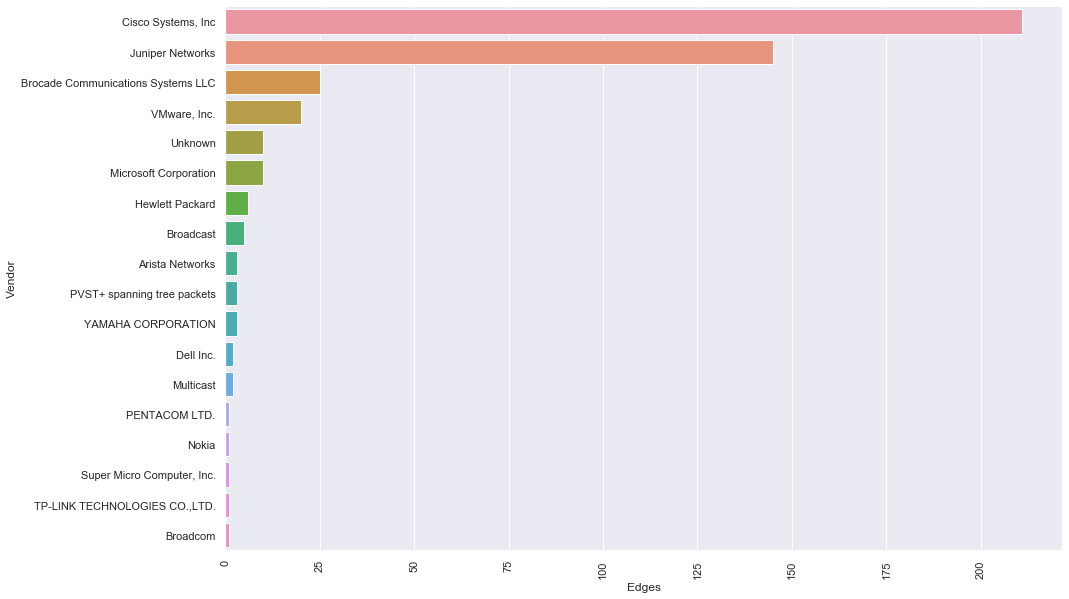

In [51]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
plot = sb.barplot(x = 'Edges', y = 'Vendor', data = group_mac)